Most of this code can be found at <a href='https://keras.io'>keras.io</a>

## Questions
- What is a tensor? kind of everything...
- Are there other ways of building neural networks? 
    - yes. Keras, PyTorch, TensorFlow, Theano
- What is gradient descent solving for in a neural network?
    - Perceptron? - weights
- Gradient Descent Methods
    - Stochastic Gradient Descent
        - Tries a lot of starting points and picks the set of parameters that give the lowest error
    - ADAM (Adaptive Momentum)
        - [blog here](https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/)

- RNNs -> optimize hidden state
- LSTMs -> optimize hidden state and a cell state
- GRUs -> optimize hidden state
- CNNs -> optimize filters

## Objectives 
YWBAT 
- build a neural network using keras
- compare models based on their depth
- *choose the best optimizer for a model*

### Why do we use NNs?
- identify combinations of features and learn combinations of features
- reduces the need for domain expertise
    - unstructured data is handled better
    - ambiguous data

### Outline
* Import data
* Build single layer model
* Build 2 layer model
* Students build their own deep learning model
* evaluate models, tune optimizers

# Useful Imports

In [16]:
import keras
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [17]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

# SKIP
--------

In [5]:
"""
Attribute Information:

fLength: continuous # major axis of ellipse [mm]
fWidth: continuous # minor axis of ellipse [mm]
fSize: continuous # 10-log of sum of content of all pixels [in #phot]
fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
fConc1: continuous # ratio of highest pixel over fSize [ratio]
fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
fM3Long: continuous # 3rd root of third moment along major axis [mm]
fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
fAlpha: continuous # angle of major axis with vector to origin [deg]
fDist: continuous # distance from origin to center of ellipse [mm]
class: g,h # gamma (signal), hadron (background)
"""

'\nAttribute Information:\n\nfLength: continuous # major axis of ellipse [mm]\nfWidth: continuous # minor axis of ellipse [mm]\nfSize: continuous # 10-log of sum of content of all pixels [in #phot]\nfConc: continuous # ratio of sum of two highest pixels over fSize [ratio]\nfConc1: continuous # ratio of highest pixel over fSize [ratio]\nfAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]\nfM3Long: continuous # 3rd root of third moment along major axis [mm]\nfM3Trans: continuous # 3rd root of third moment along minor axis [mm]\nfAlpha: continuous # angle of major axis with vector to origin [deg]\nfDist: continuous # distance from origin to center of ellipse [mm]\nclass: g,h # gamma (signal), hadron (background)\n'

In [6]:
### Let's load in some custom data
df = pd.read_csv("MagicTelescope.csv")
display(df.head(2))
df.drop("ID", axis=1, inplace=True)
df.head(2)

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


In [7]:
X, y = df.drop('class:', axis=1), df["class:"]
y.shape

(19020,)

In [ ]:
# one-hot encode your target in order to use softmax activation
# softmax activation is better under optimization
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()
y.shape, y

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

### What did we learn?
- use Relu on dense layers that aren't going to the output
- onehotencode target (even if binary) because
    - because we can then use `softmax` activation
    - `softmax` activation performs much better than `sigmoid` under gradient descent

-------

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((90, 4), (60, 4), (90, 3), (60, 3))

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [24]:
from keras.models import Sequential # this just means we go through our network in order of our layers

model = Sequential()

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [29]:
from keras.layers import Dense

model = Sequential()

# first hidden layer use input_dim=4 for iris dataset
model.add(Dense(units=6, activation='relu', input_dim=4, use_bias=True))

# output layer
model.add(Dense(units=3, activation='softmax'))

In [30]:
model.summary()

# if bias:
#     param = (input+1)*units = edges -> number of weights

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


Compile the model to a form that the computer can more easily work with

In [31]:
# stochastic gradient descent with momentum as our optimizer
model_optimizer = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=model_optimizer)

# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [32]:
history = model.fit(x_train, y_train, epochs=20, batch_size=20, verbose=1)

Epoch 1/20
90/90 [==============================] - 0s 2ms/step - loss: 1.5971
Epoch 2/20
90/90 [==============================] - 0s 82us/step - loss: 1.5590
Epoch 3/20
90/90 [==============================] - 0s 79us/step - loss: 1.5048
Epoch 4/20
90/90 [==============================] - 0s 65us/step - loss: 1.4474
Epoch 5/20
90/90 [==============================] - 0s 87us/step - loss: 1.3854
Epoch 6/20
90/90 [==============================] - 0s 110us/step - loss: 1.3267
Epoch 7/20
90/90 [==============================] - 0s 104us/step - loss: 1.2709
Epoch 8/20
90/90 [==============================] - 0s 112us/step - loss: 1.2219
Epoch 9/20
90/90 [==============================] - 0s 110us/step - loss: 1.1802
Epoch 10/20
90/90 [==============================] - 0s 93us/step - loss: 1.1394
Epoch 11/20
90/90 [==============================] - 0s 112us/step - loss: 1.1048
Epoch 12/20
90/90 [==============================] - 0s 102us/step - loss: 1.0724
Epoch 13/20
90/90 [=============

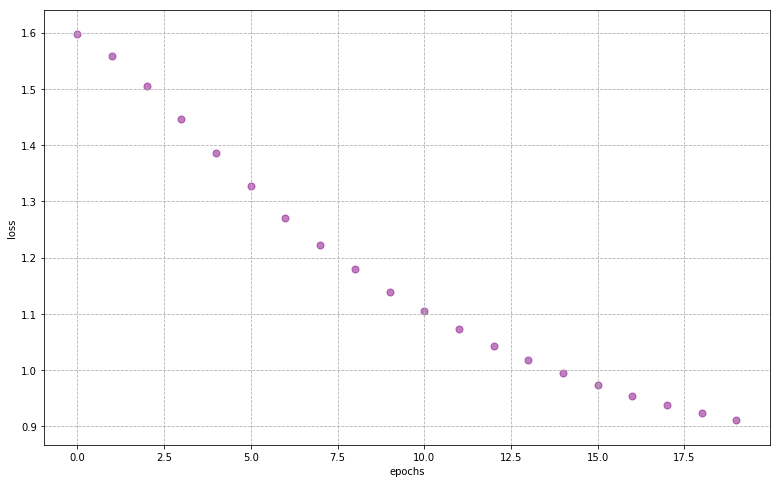

In [33]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

# Evaluating the Trained Model

We can look at the overall loss from our test data after training the model was trained

In [34]:
# Could also just use a batch to evaluate
loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

60/60 [==============================] - 0s 831us/step


0.9362161715825399

We can have predictions (probability the data point is a particular class based on our trained model)

In [35]:
probs = model.predict(x_test)
probs[:10]

array([[0.28151223, 0.30033693, 0.4181508 ],
       [0.22379081, 0.37452775, 0.40168145],
       [0.17440961, 0.33828104, 0.48730937],
       [0.21485232, 0.39738107, 0.38776663],
       [0.29573134, 0.30859026, 0.39567843],
       [0.04535163, 0.3580819 , 0.5965665 ],
       [0.23745097, 0.390741  , 0.37180805],
       [0.11469834, 0.34370187, 0.5415998 ],
       [0.05050412, 0.3154868 , 0.63400906],
       [0.22578603, 0.3942466 , 0.3799674 ]], dtype=float32)

We want to say what is the predicted class, so we pick just the largest probability for each result

In [36]:
predictions = np.argmax(probs, axis=1)

predictions[:10]

array([2, 2, 2, 1, 2, 2, 1, 2, 2, 1])

In [37]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.51666667])

In [38]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1])
print(report)

              precision    recall  f1-score   support

           0       0.75      0.13      0.22        23
           1       0.44      0.44      0.44        16

   micro avg       0.50      0.26      0.34        39
   macro avg       0.59      0.28      0.33        39
weighted avg       0.62      0.26      0.31        39



Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

### But Behold!!!! An out of the box RFC comes into the fold! 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = RandomForestClassifier()

In [41]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
clf_preds = clf.predict(x_test)
clf.score(x_test, y_test)

0.9166666666666666

In [43]:
report = classification_report(y_test, clf_preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.79      0.94      0.86        16
           2       0.94      0.81      0.87        21

   micro avg       0.92      0.92      0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60
 samples avg       0.92      0.92      0.92        60



### What did we learn?
- NN are good for a lot of things, but are just another model
- Learned that the bias term is incorporated as a unit node to the layer. 

### Let's add another Layer

In [44]:
### Let's build a new model and add another layer
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=4, units=6, activation='relu'))
model_mlp.add(Dense(units=6, activation='relu'))


# classifier layer
model_mlp.add(Dense(units=3, activation='softmax'))


model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
90/90 [==============================] - 0s 2ms/step - loss: 1.0754
Epoch 2/50
90/90 [==============================] - 0s 76us/step - loss: 1.0718
Epoch 3/50
90/90 [==============================] - 0s 48us/step - loss: 1.0663
Epoch 4/50
90/90 [==============================] - 0s 59us/step - loss: 1.0594
Epoch 5/50
90/90 [==============================] - 0s 49us/step - loss: 1.0520
Epoch 6/50
90/90 [==============================] - 0s 54us/step - loss: 1.0436
Epoch 7/50
90/90 [==============================] - 0s 67us/step - loss: 1.0349
Epoch 8/50
90/90 [==============================] - 0s 53us/step - loss: 1.0255
Epoch 9/50
90/90 [==============================] - 0s 46us/step - loss: 1.0163
Epoch 10/50
90/90 [==============================] - 0s 51us/step - loss: 1.0063
Epoch 11/50
90/90 [==============================] - 0s 47us/step - loss: 0.9968
Epoch 12/50
90/90 [==============================] - 0s 53us/step - loss: 0.9869
Epoch 13/50
90/90 [===================

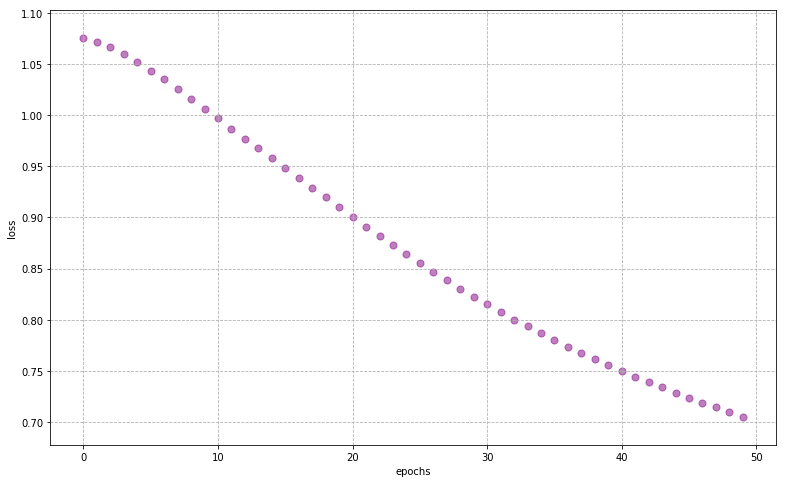

In [45]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

plot_history(history_mlp)

In [46]:
loss_and_metrics = model_mlp.evaluate(x_test, y_test)

loss_and_metrics

60/60 [==============================] - 0s 1ms/step


0.6719951947530111

In [47]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.68333333])

In [48]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1])
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.00      0.00      0.00        16

   micro avg       0.88      0.56      0.69        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.56      0.56      0.56        39



In [50]:
x_train.shape

(90, 4)

#### Add another layer and plot the loss

In [51]:
# Build your model
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=4, units=6, activation='relu'))
model_mlp.add(Dense(units=12, activation='relu'))
model_mlp.add(Dense(units=24, activation = 'relu'))

# classifier layer
model_mlp.add(Dense(units=3, activation='softmax'))


display(model_mlp.summary())

# Compile it


# fit your model using 100 epochs


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_18 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 75        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/50
90/90 [==============================] - 0s 3ms/step - loss: 1.1905
Epoch 2/50
90/90 [==============================] - 0s 70us/step - loss: 1.1873
Epoch 3/50
90/90 [==============================] - 0s 85us/step - loss: 1.1826
Epoch 4/50
90/90 [==============================] - 0s 82us/step - loss: 1.1766
Epoch 5/50
90/90 [==============================] - 0s 67us/step - loss: 1.1703
Epoch 6/50
90/90 [==============================] - 0s 90us/step - loss: 1.1630
Epoch 7/50
90/90 [==============================] - 0s 85us/step - loss: 1.1559
Epoch 8/50
90/90 [==============================] - 0s 70us/step - loss: 1.1492
Epoch 9/50
90/90 [==============================] - 0s 65us/step - loss: 1.1420
Epoch 10/50
90/90 [==============================] - 0s 76us/step - loss: 1.1353
Epoch 11/50
90/90 [==============================] - 0s 70us/step - loss: 1.1293
Epoch 12/50
90/90 [==============================] - 0s 73us/step - loss: 1.1230
Epoch 13/50
90/90 [===================

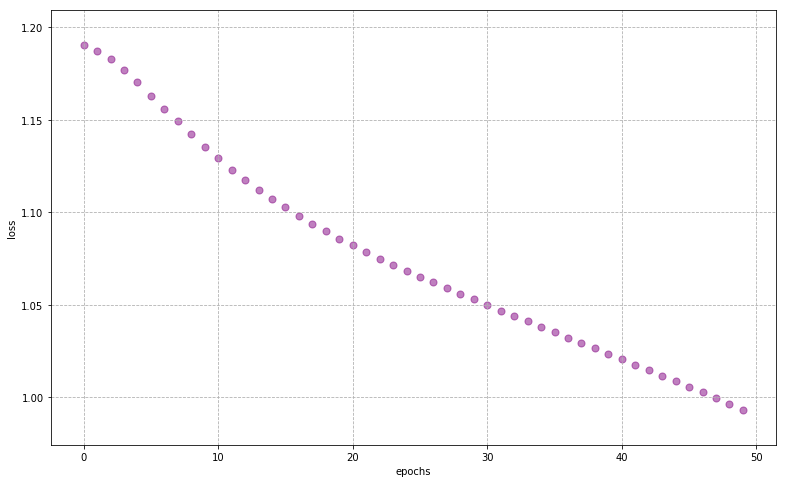

In [52]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

plot_history(history_mlp)

In [53]:
# Evaluate your model
model_mlp.evaluate(x_test, y_test)

60/60 [==============================] - 0s 1ms/step


0.9922607819239299

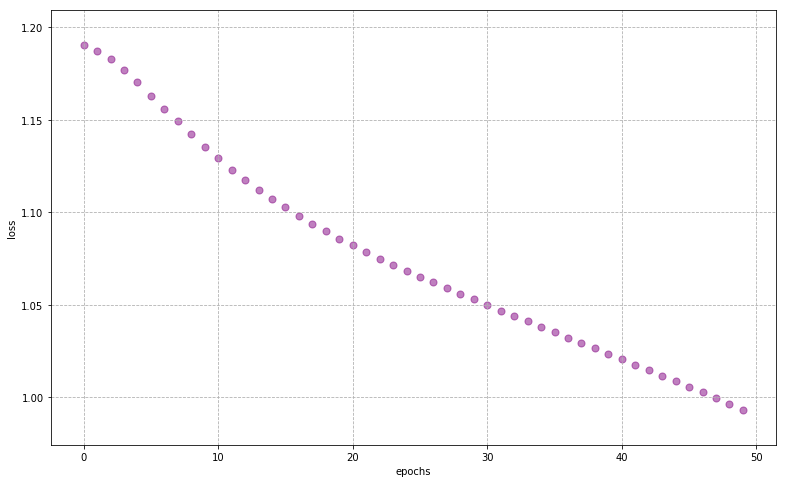

In [54]:
# Plot your loss
plot_history(history_mlp)

In [52]:
### Let's make it better
### Let's build a new model with 2 layers but a different optimizer
### User ADAM optimization
model_mlp = Sequential()


# hidden layers
model_mlp.add(Dense(input_dim=10, units=32, activation='relu'))
model_mlp.add(Dense(units=16, activation='relu'))


# classifier layer
model_mlp.add(Dense(units=2, activation='softmax'))


model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 34        
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_mlp.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam())

In [54]:
history_mlp = model_mlp.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
11412/11412 [==============================] - 1s 86us/step - loss: 0.4761
Epoch 2/50
11412/11412 [==============================] - 0s 31us/step - loss: 0.3699
Epoch 3/50
11412/11412 [==============================] - 0s 36us/step - loss: 0.3468
Epoch 4/50
11412/11412 [==============================] - 0s 36us/step - loss: 0.3368
Epoch 5/50
11412/11412 [==============================] - 0s 33us/step - loss: 0.3305
Epoch 6/50
11412/11412 [==============================] - 0s 35us/step - loss: 0.3259
Epoch 7/50
11412/11412 [==============================] - 0s 37us/step - loss: 0.3218: 0s - loss: 0.322
Epoch 8/50
11412/11412 [==============================] - 0s 42us/step - loss: 0.3192
Epoch 9/50
11412/11412 [==============================] - 0s 38us/step - loss: 0.3167
Epoch 10/50
11412/11412 [==============================] - 0s 38us/step - loss: 0.3145
Epoch 11/50
11412/11412 [==============================] - 0s 37us/step - loss: 0.3117
Epoch 12/50
11412/11412 [=========

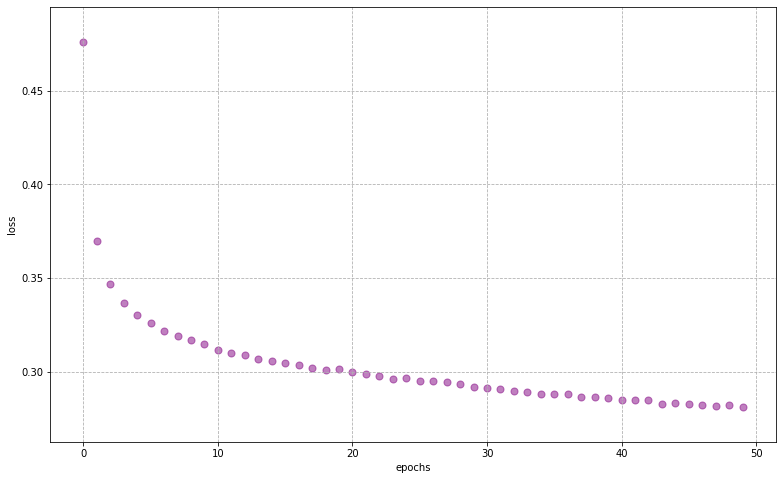

In [55]:
plot_history(history_mlp)

In [56]:
model_mlp.evaluate(x_test, y_test)

7608/7608 [==============================] - 0s 35us/step


0.3239707359192123

In [57]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86671924])

In [58]:
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4889
           1       0.89      0.72      0.79      2719

    accuracy                           0.87      7608
   macro avg       0.87      0.83      0.85      7608
weighted avg       0.87      0.87      0.86      7608



### What did we learn?
- Use ADAM optimization
- Best practices for Deep Learning
    - ADAM/ReLu/Softmax
    - Onehotencode Labels